### Libraries

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn import ensemble,tree,linear_model
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 1 : Data Exploration:

In [7]:
DS1 = pd.read_csv(r"C:\Users\Anuja Verma\Downloads\Processed_Flipdata - Processed_Flipdata.csv")
DS1

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° 

In [8]:
DS1.head()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° 

In [9]:
DS1.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [10]:
DS1.tail()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° 

In [11]:
DS1.shape

(541, 776)

In [12]:
DS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 776 entries, Unnamed: 0 to Prize_920
dtypes: bool(770), float64(1), int64(5)
memory usage: 432.3 KB


## 2. Data Preprocessing:

In [13]:
## Checking for Any N/A Values
DS1.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [15]:
## Checking for Missing Values
DS1.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [16]:
## Checking for Duplicate Values
DS1.duplicated().sum()

0

In [29]:
##  Dropping Unnamed Column 
DS1 = DS1.loc[:, ~DS1.columns.str.contains('^Unnamed')]
DS1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [19]:
DS1.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


### Identify Unique Values

In [25]:
# Outliers Detection using IQR (only for numeric columns)
numeric_cols = DS1.select_dtypes(include=['number']).columns
A1 = DS1[numeric_cols].quantile(0.25)
A2 = DS1 [numeric_cols].quantile(0.75)
IQR = A2-A1 

outliers = ((DS1[numeric_cols] < (A1 - 1.5 * IQR)) | (DS1[numeric_cols] > (A2 + 1.5 * IQR))).sum()
print("Outliers Count Per Column:\n" , outliers)


Outliers Count Per Column:
 Unnamed: 0         0
Memory            55
RAM                0
Battery_         152
AI Lens           34
Mobile Height     33
dtype: int64


### One Hot Encoding : Here we canvert a categorical columns into  numerical columns

In [13]:
DS1_encoded = pd.get_dummies(DS1)

# Save the new encoded DataFrame if needed
DS1_encoded.to_csv(r'C:\Users\Anuja Verma\Downloads\Processed_Flipdata - Processed_Flipdata.csv', index=False)

## 3. Feature Extraction:


### A Statistical Analysis

### To Find Mean, Media,& Mode per column

In [26]:
DS1.select_dtypes(include=['number']).mean()

Unnamed: 0        289.711645
Memory            110.550832
RAM                 5.397412
Battery_         4871.587800
AI Lens             0.062847
Mobile Height      16.431201
dtype: float64

In [27]:
DS1.select_dtypes(include=['number']).median()

Unnamed: 0        273.00
Memory            128.00
RAM                 6.00
Battery_         5000.00
AI Lens             0.00
Mobile Height      16.71
dtype: float64

In [28]:
DS1.select_dtypes(include=['number']).mode()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,128.0,4.0,5000.0,0.0,16.76
1,1,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
536,637,NaN,NaN,NaN,NaN,NaN
537,638,NaN,NaN,NaN,NaN,NaN
538,639,NaN,NaN,NaN,NaN,NaN
539,641,NaN,NaN,NaN,NaN,NaN


### To Find Standard Deviation & Variance per column

In [30]:
DS1.select_dtypes(include=['number']).std()

Memory            60.600694
RAM                1.984923
Battery_         780.148862
AI Lens            0.242911
Mobile Height      2.523553
dtype: float64

In [31]:
DS1.select_dtypes(include=['number']).var()

Memory             3672.444171
RAM                   3.939919
Battery_         608632.246443
AI Lens               0.059006
Mobile Height         6.368318
dtype: float64

### To Find Skewness per column

In [32]:
DS1.select_dtypes(include=['number']).skew()

Memory           1.029704
RAM              0.067617
Battery_        -3.304250
AI Lens          3.612638
Mobile Height    1.171778
dtype: float64

### To Find Kurtosis per column

In [33]:
DS1.select_dtypes(include=['number']).kurt()

Memory            0.855888
RAM              -1.306301
Battery_         14.752188
AI Lens          11.092146
Mobile Height    48.220112
dtype: float64

### Visualizations

In [28]:
# Drop unnecessary columns
DS1_clean = DS1.drop(columns=['Unnamed: 0','Model', 'Colour'])

# Convert 'Prize' to numeric by removing commas and casting to int
DS1_clean['Prize'] = DS1_clean['Prize'].astype(str).str.replace(',', '').astype(int)

# Convert 'Rear Camera' and 'Front Camera' from string (e.g., '13MP') to int
DS1_clean['Rear Camera'] = DS1_clean['Rear Camera'].astype(str).str.replace('MP', '').astype(int)
DS1_clean['Front Camera'] = DS1_clean['Front Camera'].astype(str).str.replace('MP', '').astype(int)

# Encode 'Processor_' using label encoding (for simplicity)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
DS1_clean['Processor_'] = le.fit_transform(DS1_clean['Processor_'])

# Preview cleaned data
DS1_clean.head()


,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,64,4,6000,13,5,1,16.76,113,7299
1,64,4,6000,13,5,1,16.76,113,7299
2,128,8,5000,50,16,0,16.64,75,11999
3,32,2,5000,8,5,0,16.56,56,5649
4,128,8,5000,50,5,1,16.76,14,8999


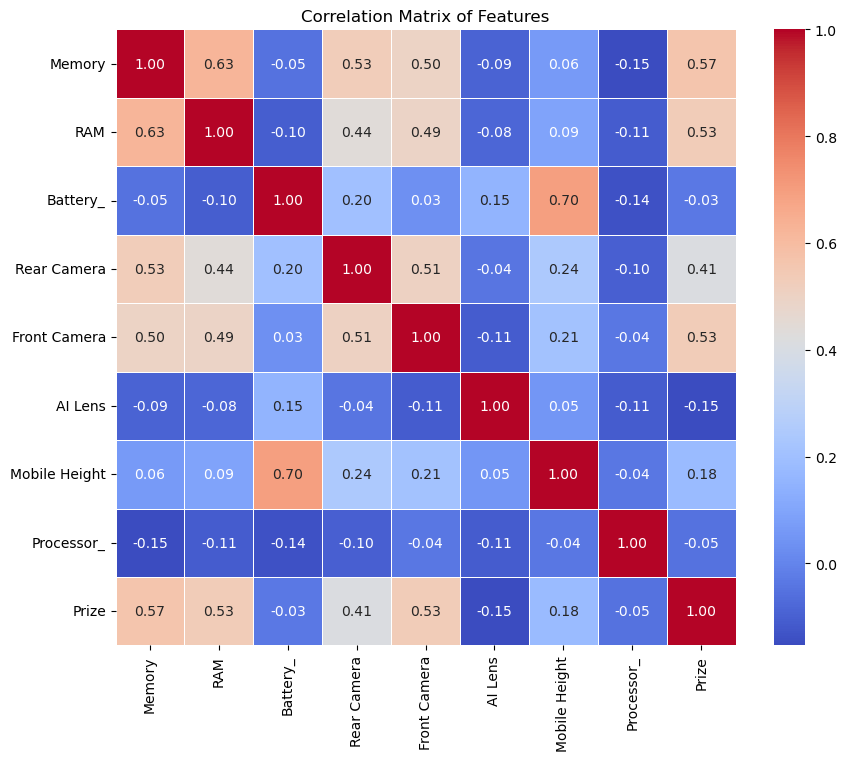

Memory           0.566660
Front Camera     0.532321
RAM              0.532024
Rear Camera      0.410367
Mobile Height    0.176009
Battery_        -0.034297
Processor_      -0.050244
AI Lens         -0.153691
Name: Prize, dtype: float64

In [62]:
# Compute correlation matrix
correlation_matrix = DS1_clean.corr(numeric_only=True)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Sort features by correlation with 'Prize'
price_corr = correlation_matrix['Prize'].drop('Prize').sort_values(ascending=False)
price_corr


## 4. Model Building:

### Split the dataset
 Use scikit-learn's train_test_split to divide dataset into training and testing sets.

In [70]:
X = DS1_clean.drop(columns=['Prize'])  # Features
y = DS1_clean['Prize']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Random Forest Regressor

Random Forest is an ensemble learning method that builds multiple decision trees and merges their results for more accurate and stable predictions.

In [74]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluate model

After training, assess the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [77]:
# predictio
ns on the test set

y_pred = model.predict(X_test)

# Calculate evaluation metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}") ## MSE - The average squared difference between actual and predicted prices.
print(f"R² Score: {r2:.2f}")                  ## R² Score-  Indicates how well the model explains variance in price. Closer to 1 is better.

Mean Squared Error (MSE): 25245366.20
R² Score: 0.82


### Feature Importance

Determine which features most influence the price prediction.


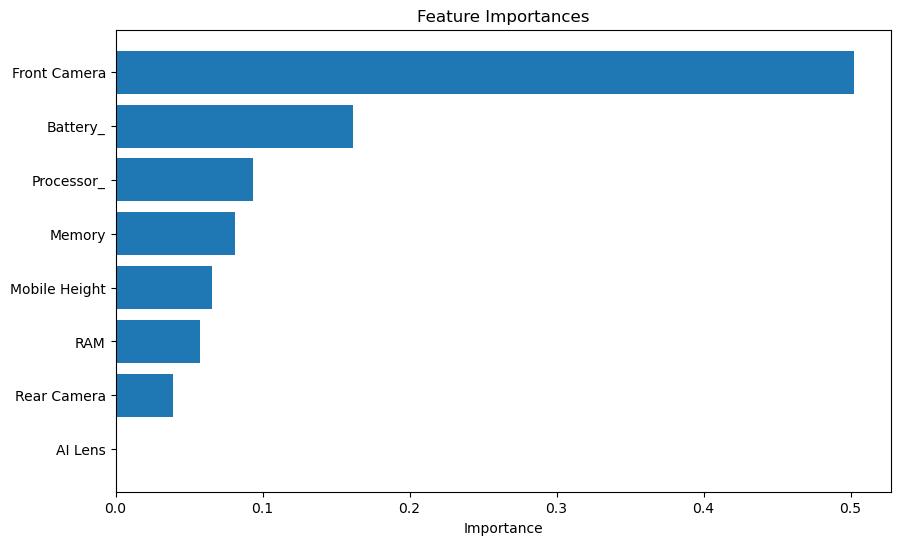

In [78]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## 5. Model Evaluation:

In [79]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1794.58
Root Mean Squared Error (RMSE): 5024.48
R-squared (R²): 0.82


## 6. Feature Importance Analysis

### Analyze and visualize feature importances

               Feature  Importance
0           Unnamed: 0    0.086810
2                  RAM    0.058594
1               Memory    0.045300
5        Mobile Height    0.037217
3             Battery_    0.020531
478   Rear Camera_50MP    0.013562
486  Front Camera_16MP    0.010677
492   Front Camera_5MP    0.009379
494   Front Camera_8MP    0.009153
480   Rear Camera_64MP    0.007924


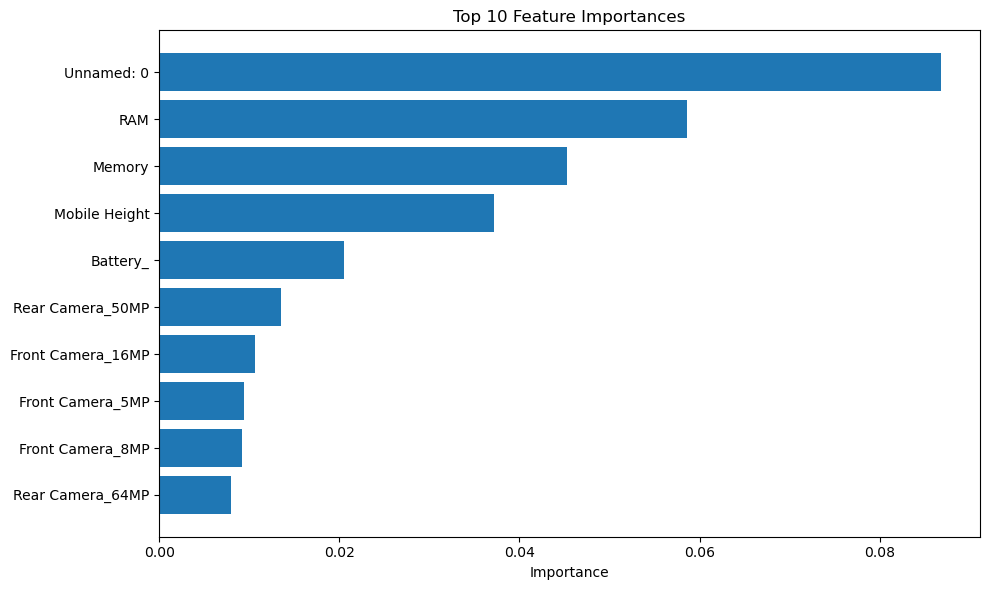

In [30]:
# Create a DataFrame of features and their importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()
